*** Assignment: Stock Market Analysis ***

In [50]:
import pandas as pd
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
stock_data = pd.read_csv('e:\Capstone Project\Stock Market Data Analysis\Stock_Market_Data.csv')
stock_data.head(10)

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19
5,09-01-2022,01.Bank,23.47,23.62,22.98,23.14,1813583.91
6,10-01-2022,01.Bank,23.16,23.43,22.85,23.10,1656683.94
7,11-01-2022,01.Bank,23.22,23.61,22.98,23.25,2224838.94
8,12-01-2022,01.Bank,23.39,23.55,22.98,23.17,1756813.34
9,13-01-2022,01.Bank,23.20,23.41,22.89,23.05,1107172.59


In [52]:
stock_data.shape


(49158, 7)

In [53]:
stock_data.dtypes

Date       object
Name       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

''' Part 1: Data Cleaning and Exploration: '''

In [54]:
''' 1. Calculate basic summary statistics for each column (mean, median, standard deviation, etc.) '''

stock_data.describe()


,Open,High,Low,Close,Volume
count,49158.000000,49158.000000,49158.000000,49158.000000,4.915800e+04
mean,157.869018,159.588214,155.906364,157.351462,5.619999e+05
std,520.191624,523.348078,517.136149,519.711667,1.276909e+06
min,3.900000,3.900000,3.000000,3.800000,1.000000e+00
25%,19.000000,19.300000,18.700000,19.000000,5.109475e+04
50%,40.300000,41.000000,39.535000,40.100000,1.824160e+05
75%,89.400000,90.500000,87.700000,88.700000,5.401398e+05
max,6000.000000,6050.000000,5975.000000,6000.500000,6.593180e+07


In [55]:
''' 2. Explore the distribution of the 'Close' prices over time.'''

stock_data['Date'] = pd.to_datetime(stock_data['Date'],dayfirst=True) 
stock_data.dtypes

Date      datetime64[ns]
Name              object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [56]:
stock_data['Date'].max()

Timestamp('2022-06-30 00:00:00')

In [57]:
stock_data.head()

,Date,Name,Open,High,Low,Close,Volume
0,2022-01-02,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,2022-01-03,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,2022-01-04,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,2022-01-05,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,2022-01-06,01.Bank,23.12,23.65,23.00,23.37,2586344.19


In [58]:
stock_data.set_index('Date',inplace=False)

,Name,Open,High,Low,Close,Volume
Date,,,,,,
2022-01-02,01.Bank,22.83,23.20,22.59,22.93,1842350.41
2022-01-03,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2022-01-04,01.Bank,22.85,23.13,22.64,22.84,1354510.97
2022-01-05,01.Bank,22.91,23.20,22.70,22.98,1564334.81
2022-01-06,01.Bank,23.12,23.65,23.00,23.37,2586344.19
...,...,...,...,...,...,...
2022-06-26,ZEALBANGLA,169.00,174.90,169.00,170.30,10480.00
2022-06-27,ZEALBANGLA,174.10,176.00,166.90,167.50,13817.00
2022-06-28,ZEALBANGLA,170.00,170.90,167.00,168.10,5214.00


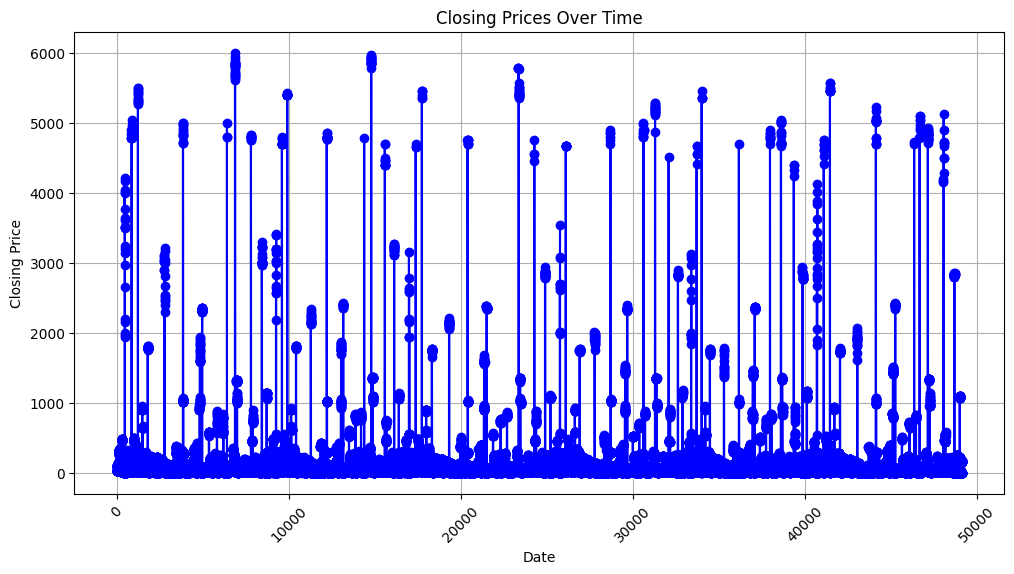

In [59]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index,stock_data['Close'],marker='o',linestyle='-',color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices Over Time')
plt.grid()
plt.xticks(rotation=45)
plt.show()


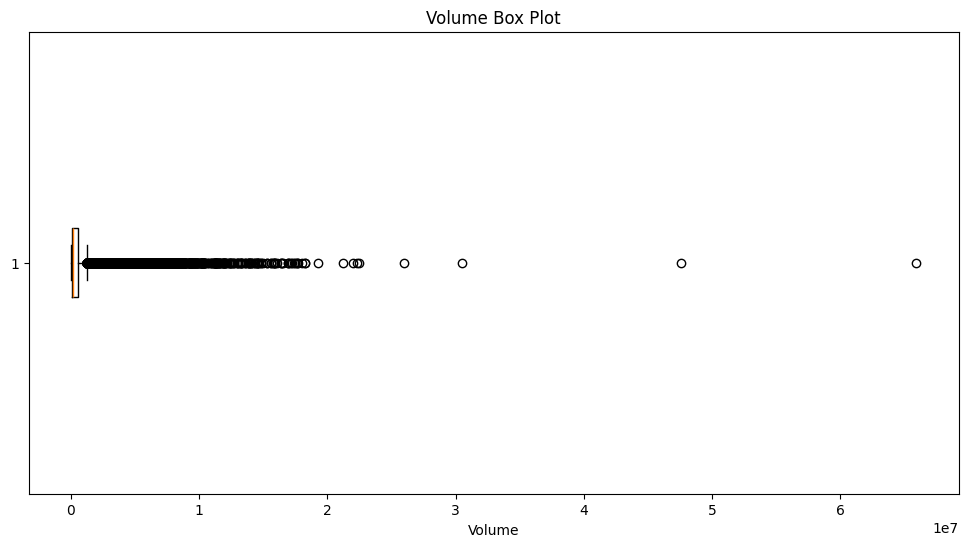

In [60]:
''' 3. Identify and analyze any outliers (if any) in the dataset.'''

#create a box plot
plt.figure(figsize=(12,6))
plt.boxplot(stock_data['Volume'],vert=False)
plt.title('Volume Box Plot')
plt.xlabel('Volume')
plt.show()


In [61]:
from sklearn.ensemble import IsolationForest

# Fit the Isolation Forest model
clf = IsolationForest(contamination=0.05)  # Adjust contamination parameter as needed
clf.fit(stock_data[['Volume']])

# Predict outliers
outliers = clf.predict(stock_data[['Volume']])

# Add an 'Outlier' column to the DataFrame
stock_data['Outlier'] = outliers

C:\Users\Shatabdi\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Shatabdi\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Shatabdi\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Shatabdi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Isol

In [62]:
stock_data.head(12)

,Date,Name,Open,High,Low,Close,Volume,Outlier
0,2022-01-02,01.Bank,22.83,23.20,22.59,22.93,1842350.41,1
1,2022-01-03,01.Bank,23.03,23.29,22.74,22.90,1664989.63,1
2,2022-01-04,01.Bank,22.85,23.13,22.64,22.84,1354510.97,1
3,2022-01-05,01.Bank,22.91,23.20,22.70,22.98,1564334.81,1
4,2022-01-06,01.Bank,23.12,23.65,23.00,23.37,2586344.19,-1
5,2022-01-09,01.Bank,23.47,23.62,22.98,23.14,1813583.91,1
6,2022-01-10,01.Bank,23.16,23.43,22.85,23.10,1656683.94,1
7,2022-01-11,01.Bank,23.22,23.61,22.98,23.25,2224838.94,1
8,2022-01-12,01.Bank,23.39,23.55,22.98,23.17,1756813.34,1
9,2022-01-13,01.Bank,23.20,23.41,22.89,23.05,1107172.59,1


In [63]:
stock_data.tail(12)

,Date,Name,Open,High,Low,Close,Volume,Outlier
49146,2022-06-15,ZEALBANGLA,167.4,171.4,164.2,165.0,6963.0,1
49147,2022-06-16,ZEALBANGLA,177.0,177.0,163.0,164.2,4204.0,1
49148,2022-06-19,ZEALBANGLA,164.2,167.9,161.1,161.5,5256.0,1
49149,2022-06-20,ZEALBANGLA,159.1,165.0,159.0,160.7,15314.0,1
49150,2022-06-21,ZEALBANGLA,165.0,165.0,160.7,160.9,2908.0,1
49151,2022-06-22,ZEALBANGLA,159.5,165.0,159.0,163.5,5705.0,1
49152,2022-06-23,ZEALBANGLA,163.0,168.0,163.0,167.8,10967.0,1
49153,2022-06-26,ZEALBANGLA,169.0,174.9,169.0,170.3,10480.0,1
49154,2022-06-27,ZEALBANGLA,174.1,176.0,166.9,167.5,13817.0,1
49155,2022-06-28,ZEALBANGLA,170.0,170.9,167.0,168.1,5214.0,1


**** Part 2: Time Series Analysis / Rolling Window / Moving Averages ****

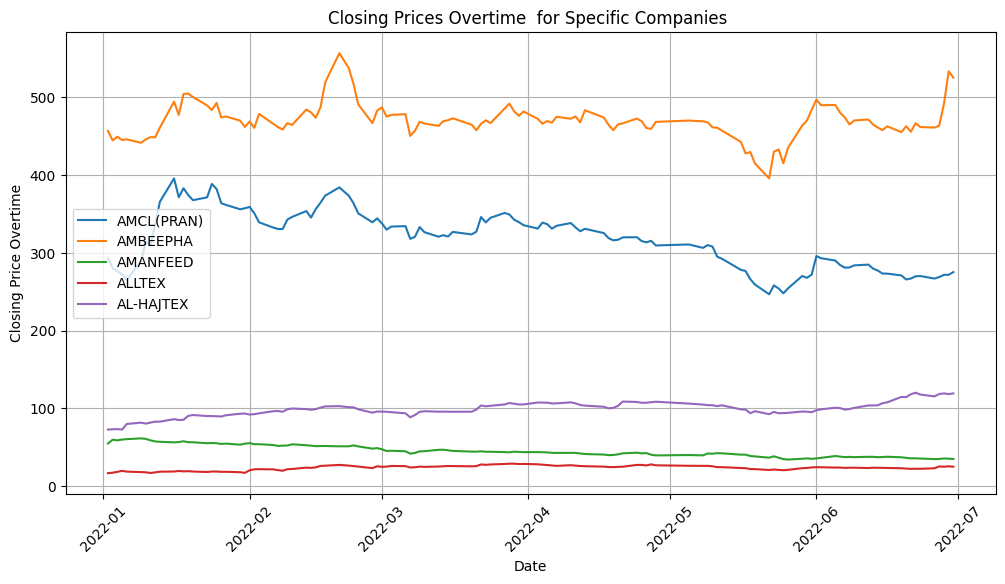

In [64]:
'''' 1. Create a line chart to visualize the 'Close' prices over time.'''

# CREATING A LIST OF SPECIFIC COMPANIES

specific_companies = ['AMCL(PRAN)','AMBEEPHA','AMANFEED','ALLTEX','AL-HAJTEX']

# filter out your desired companies data and put it to your another dataframe

specific_data = stock_data[stock_data['Name'].isin(specific_companies)]

# creating line graph for each companies
plt.figure(figsize=(12,6))

for company in specific_companies:
    company_data = specific_data[specific_data['Name']==company]
    plt.plot(company_data['Date'],company_data['Close'],label=company)

# Adding labels and titles
plt.xlabel('Date')
plt.ylabel('Closing Price Overtime')
plt.title('Closing Prices Overtime  for Specific Companies ')
plt.legend() 
plt.grid()

# Improving Readability
plt.xticks(rotation=45)
plt.show()


In [65]:
''''2. Calculate and plot the daily percentage change in closing prices.'''

# Calculate the daily percentage change
stock_data['Daily_Percent_Change'] = (stock_data['Close'].pct_change()) * 100

In [66]:
stock_data.tail(7)

,Date,Name,Open,High,Low,Close,Volume,Outlier,Daily_Percent_Change
49151,2022-06-22,ZEALBANGLA,159.5,165.0,159.0,163.5,5705.0,1,1.615911
49152,2022-06-23,ZEALBANGLA,163.0,168.0,163.0,167.8,10967.0,1,2.629969
49153,2022-06-26,ZEALBANGLA,169.0,174.9,169.0,170.3,10480.0,1,1.489869
49154,2022-06-27,ZEALBANGLA,174.1,176.0,166.9,167.5,13817.0,1,-1.644157
49155,2022-06-28,ZEALBANGLA,170.0,170.9,167.0,168.1,5214.0,1,0.358209
49156,2022-06-29,ZEALBANGLA,167.1,169.0,164.9,165.1,6678.0,1,-1.784652
49157,2022-06-30,ZEALBANGLA,165.1,174.0,164.0,172.2,5883.0,1,4.300424


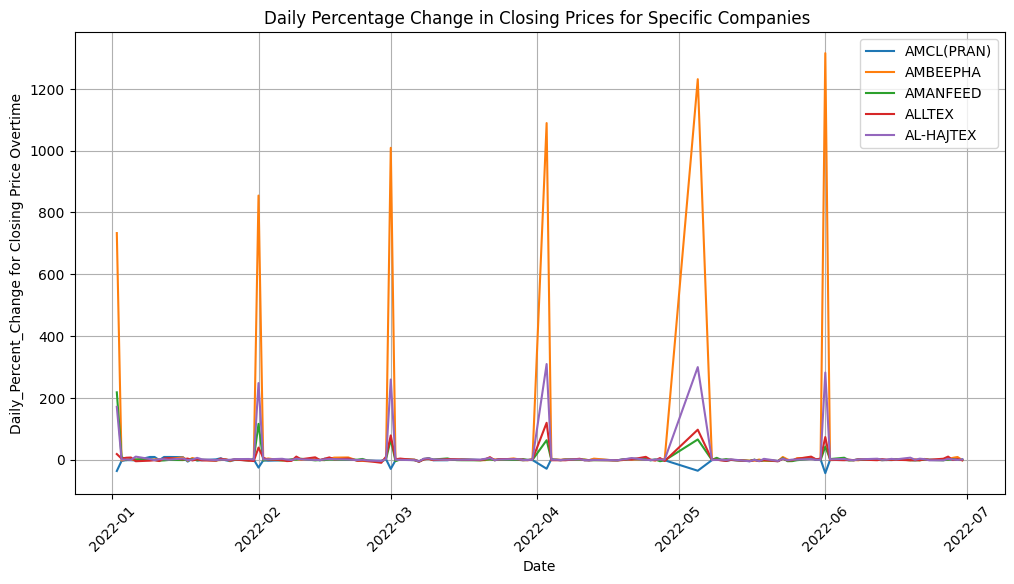

In [67]:
# CREATING A LIST OF SPECIFIC COMPANIES

specific_companies = ['AMCL(PRAN)','AMBEEPHA','AMANFEED','ALLTEX','AL-HAJTEX']

# filter out your desired companies data and put it to your another dataframe

specific_data = stock_data[stock_data['Name'].isin(specific_companies)]

# creating line graph for each companies
plt.figure(figsize=(12,6))

for company in specific_companies:
    company_data = specific_data[specific_data['Name']==company]
    plt.plot(company_data['Date'],company_data['Daily_Percent_Change'],label=company)

# Adding labels and titles
plt.xlabel('Date')
plt.ylabel('Daily_Percent_Change for Closing Price Overtime')
plt.title('Daily Percentage Change in Closing Prices for Specific Companies ')
plt.legend() 
plt.grid()

# Improving Readability
plt.xticks(rotation=45)
plt.show()


In [68]:
'''3. Investigate the presence of any trends or seasonality in the stock prices.'''




# decompose the close price
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(stock_data['Close'], model='additive', period=30)
decomposition



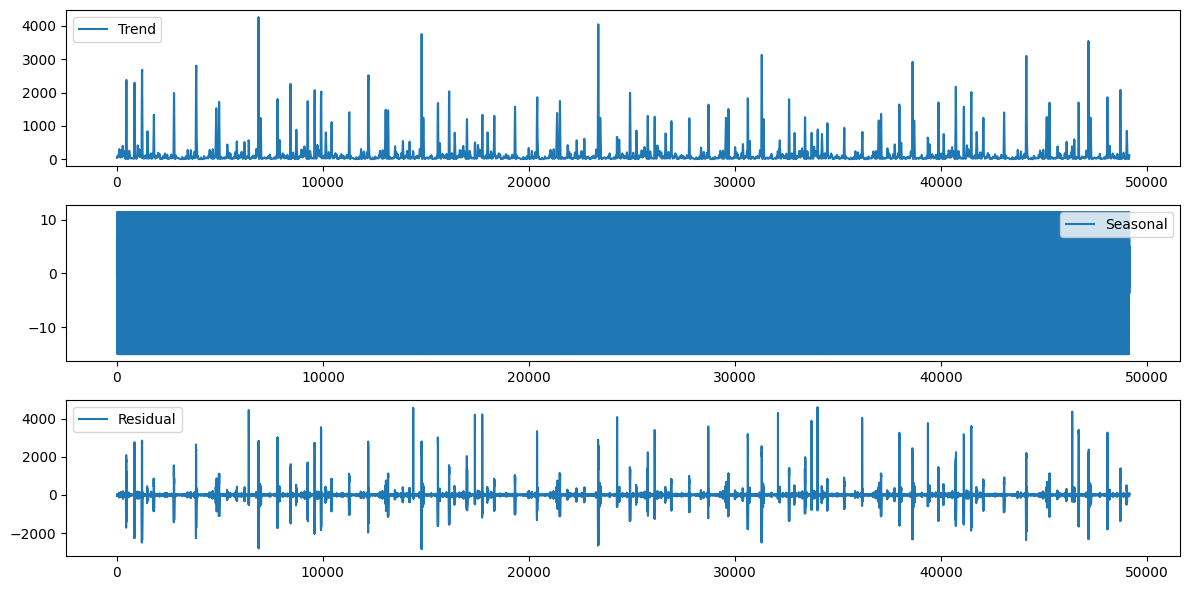

In [69]:
plt.figure(figsize=(12,6))
plt.subplot(311)
plt.plot(decomposition.trend,label='Trend')
plt.legend()
plt.subplot(312)
plt.plot(decomposition.seasonal,label='Seasonal')
plt.legend()
plt.subplot(313)
plt.plot(decomposition.resid,label='Residual')
plt.legend()
plt.tight_layout()
plt.show()


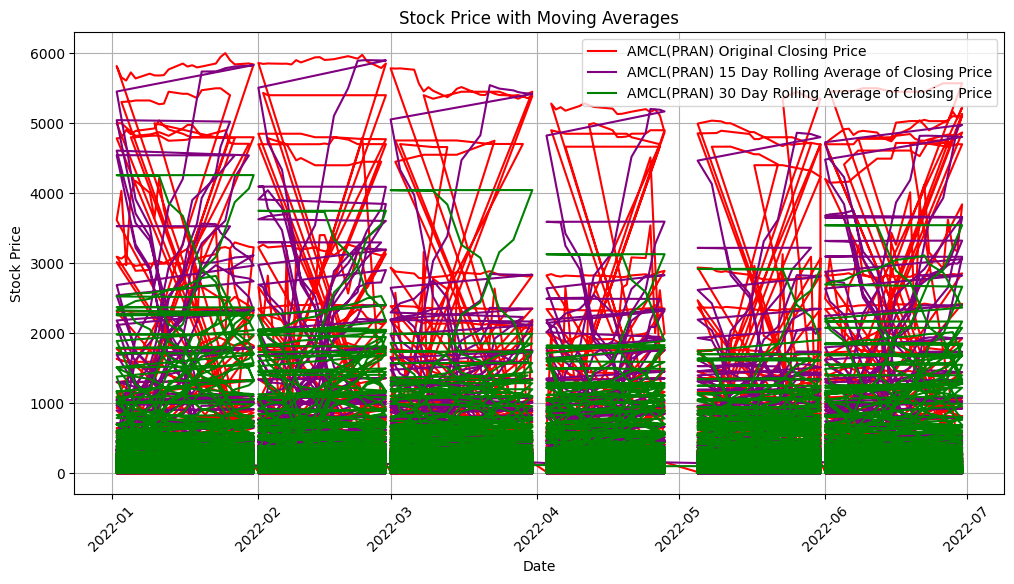

In [70]:
'''4. Apply moving averages to smooth the time series data in 15/30 day intervals against the original graph.'''

specific_company = 'AMCL(PRAN)'
stock_data['Name']==specific_company

stock_data['15 day rolling averages'] = stock_data['Close'].rolling(window=15).mean()
stock_data['30 day rolling averages'] = stock_data['Close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(stock_data['Date'],stock_data['Close'],label=f'{specific_company} Original Closing Price',color='red')
plt.plot(stock_data['Date'],stock_data['15 day rolling averages'],label=f'{specific_company} 15 Day Rolling Average of Closing Price',color='purple')
plt.plot(stock_data['Date'],stock_data['30 day rolling averages'],label=f'{specific_company} 30 Day Rolling Average of Closing Price',color='green')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price with Moving Averages')

plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [71]:
''''5. Calculate the average closing price for each stock.'''

average_closing_price = stock_data['Close'].mean()
average_closing_price

157.35146181699827

In [72]:
''''6.Identify the top 5 and bottom 5 stocks based on average closing price.'''

average_closing_price_top5 = stock_data.sort_values('Close',ascending=False).head(5)
average_closing_price_top5.mean(numeric_only=True)


Open                       5962.980000
High                       6005.600000
Low                        5914.380000
Close                      5965.000000
Volume                     1420.800000
Outlier                       1.000000
Daily_Percent_Change          0.839690
15 day rolling averages    5376.153333
30 day rolling averages    2946.046000
dtype: float64

In [73]:
average_closing_price_bot5 = stock_data.sort_values('Close',ascending=True).head(5)
average_closing_price_bot5.mean(numeric_only=True)


Open                            3.960000
High                            4.020000
Low                             3.840000
Close                           3.880000
Volume                     409707.800000
Outlier                         1.000000
Daily_Percent_Change           -1.500000
15 day rolling averages         5.397333
30 day rolling averages         7.770667
dtype: float64

*** Part 3: Volatility Analysis ***

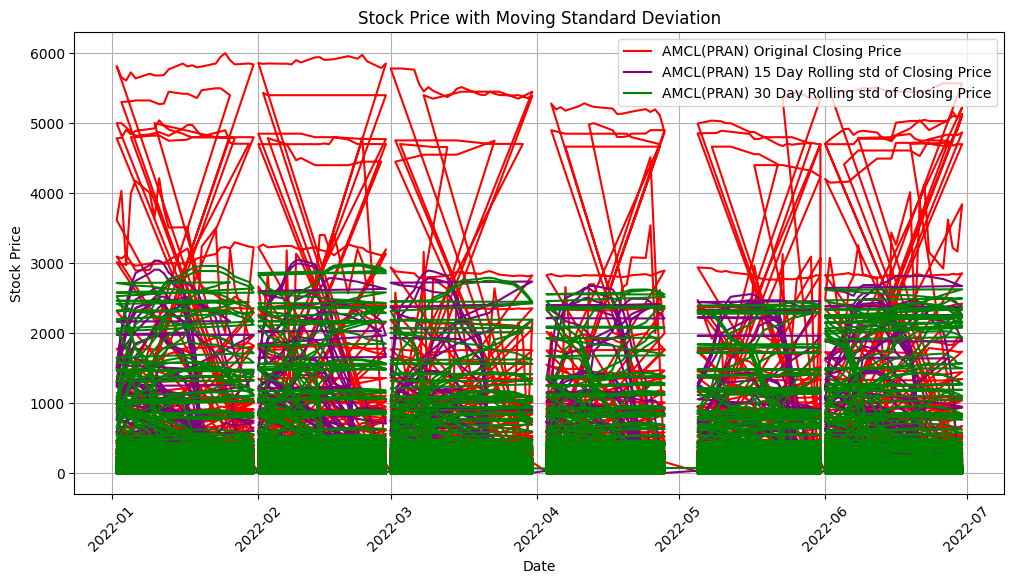

In [74]:
''' 1. Calculate and plot the rolling standard deviation of the 'Close' prices.'''

specific_company = 'AMCL(PRAN)'
stock_data['Name']==specific_company

stock_data['15 day rolling std'] = stock_data['Close'].rolling(window=15).std()
stock_data['30 day rolling std'] = stock_data['Close'].rolling(window=30).std()

plt.figure(figsize=(12,6))
plt.plot(stock_data['Date'],stock_data['Close'],label=f'{specific_company} Original Closing Price',color='red')
plt.plot(stock_data['Date'],stock_data['15 day rolling std'],label=f'{specific_company} 15 Day Rolling std of Closing Price',color='purple')
plt.plot(stock_data['Date'],stock_data['30 day rolling std'],label=f'{specific_company} 30 Day Rolling std of Closing Price',color='green')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price with Moving Standard Deviation')

plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [75]:
'''2.Create a new column for daily price change (Close - Open).'''

stock_data['daily_price_change '] = stock_data['Close'] - stock_data['Open'] #Calculate daily volatility (absolute daily price change)
stock_data['daily_price_change ']

0        0.10
1       -0.13
2       -0.01
3        0.07
4        0.25
         ... 
49153    1.30
49154   -6.60
49155   -1.90
49156   -2.00
49157    7.10
Name: daily_price_change , Length: 49158, dtype: float64

<Axes: ylabel='Frequency'>

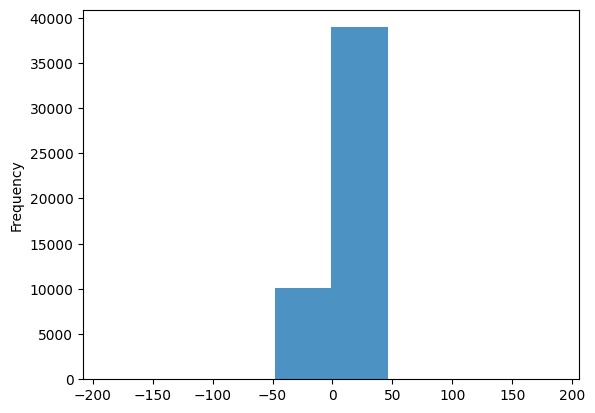

In [76]:
'''3. Analyze the distribution of daily price changes.'''

stock_data['daily_price_change '].plot(kind='hist',bins=8,alpha=0.8)


In [77]:
''' 4. Identify days with the largest price increases and decreases.'''

stock_data["PriceChange"] = stock_data["High"] - stock_data["Low"]

stock_data['max_increase_days'] = stock_data.loc[stock_data['PriceChange'].idxmax(),'Date']
stock_data['max_increase_days']

0       2022-01-11
1       2022-01-11
2       2022-01-11
3       2022-01-11
4       2022-01-11
           ...    
49153   2022-01-11
49154   2022-01-11
49155   2022-01-11
49156   2022-01-11
49157   2022-01-11
Name: max_increase_days, Length: 49158, dtype: datetime64[ns]

In [78]:
stock_data['min_increase_days'] = stock_data.loc[stock_data['PriceChange'].idxmin(),'Date']
stock_data['min_increase_days']

0       2022-01-23
1       2022-01-23
2       2022-01-23
3       2022-01-23
4       2022-01-23
           ...    
49153   2022-01-23
49154   2022-01-23
49155   2022-01-23
49156   2022-01-23
49157   2022-01-23
Name: min_increase_days, Length: 49158, dtype: datetime64[ns]

In [79]:
'''5. Identify stocks with unusually high trading volume on certain days.'''

# Calculate relative volume (current volume / average volume)

stock_data['Relative Volume'] = stock_data['Volume']/stock_data['Volume'].mean()
stock_data['Relative Volume']




0        3.278204
1        2.962615
2        2.410162
3        2.783514
4        4.602036
           ...   
49153    0.018648
49154    0.024585
49155    0.009278
49156    0.011883
49157    0.010468
Name: Relative Volume, Length: 49158, dtype: float64

In [80]:
# Filter stocks with relative volume greater than a threshold (e.g., 3 times average volume)
threshold = 3
unusual_volume_stocks = stock_data[stock_data["Relative Volume"] > threshold]
unusual_volume_stocks[['Date','Name','Volume']].head(5)

,Date,Name,Volume
0,2022-01-02,01.Bank,1842350.41
4,2022-01-06,01.Bank,2586344.19
5,2022-01-09,01.Bank,1813583.91
7,2022-01-11,01.Bank,2224838.94
8,2022-01-12,01.Bank,1756813.34


*** Part 4: Correlation and Heatmaps ***

In [81]:
'''1. Explore the relationship between trading volume and volatility'''

avg_volatility = stock_data['daily_price_change '].mean() # Calculate average daily volatility
avg_volatility

-0.5175560437772083

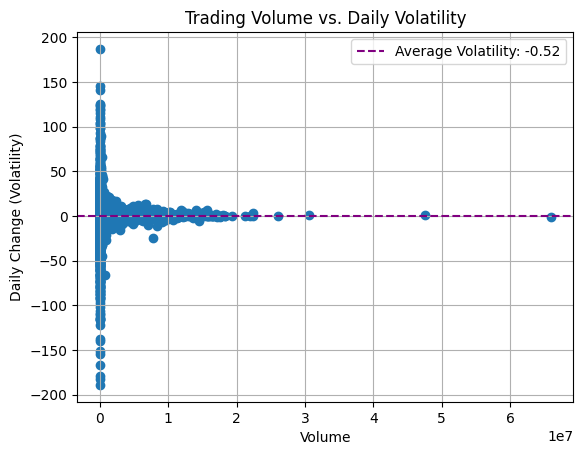

In [85]:
plt.scatter(stock_data['Volume'], stock_data['daily_price_change '])
plt.xlabel('Volume')
plt.ylabel('Daily Change (Volatility)')
plt.title('Trading Volume vs. Daily Volatility')
plt.axhline(y=avg_volatility, color='purple', linestyle='--', label=f'Average Volatility: {avg_volatility:.2f}')
plt.legend()
plt.grid()
plt.show()

In [90]:
''' 2. Calculate the correlation matrix between the 'Open' & 'High', 'Low' &'Close' prices.'''

price_columns = ["Open", "High", "Low", "Close"]
price_data = stock_data[price_columns]

correlation_matrix = price_data.corr()
correlation_matrix


,Open,High,Low,Close
Open,1.000000,0.999940,0.999939,0.999925
High,0.999940,1.000000,0.999887,0.999942
Low,0.999939,0.999887,1.000000,0.999961
Close,0.999925,0.999942,0.999961,1.000000


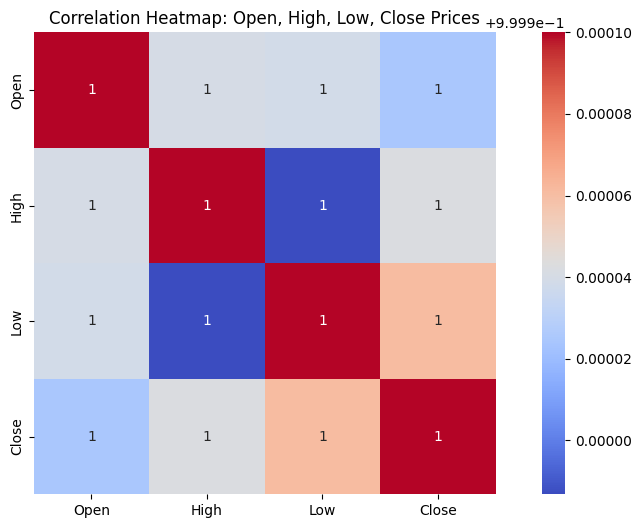

In [91]:
'''3. Create a heatmap to visualize the correlations using the seaborn package.'''

# create a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',square=True)
plt.title("Correlation Heatmap: Open, High, Low, Close Prices")
plt.show()

*** Bonus Task ***

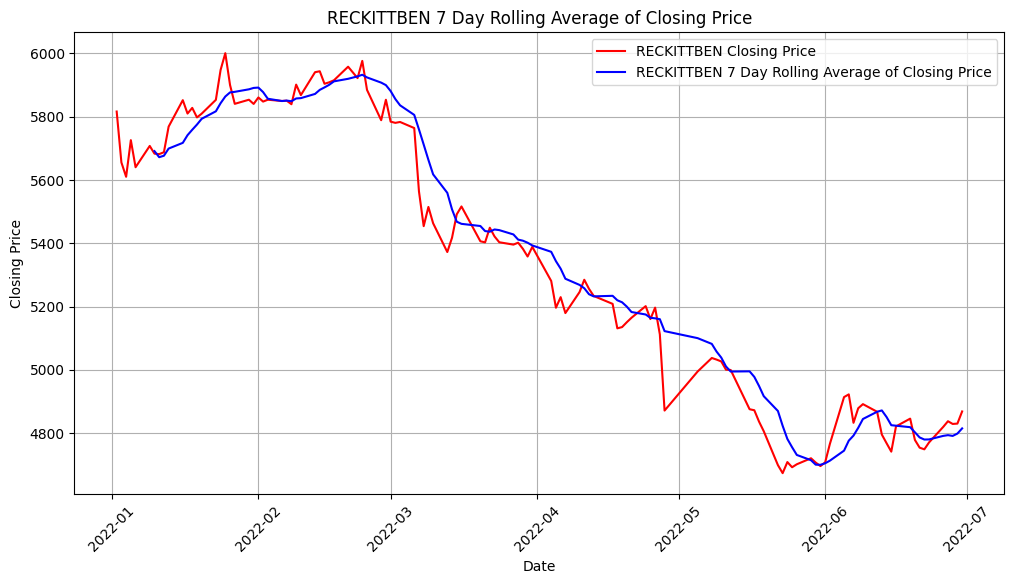

In [94]:
specific_company = 'RECKITTBEN'

specific_data = stock_data[stock_data['Name'] == specific_company].copy()
specific_data.loc[:, '7_Day_Rolling_Avg'] = specific_data['Close'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(specific_data['Date'], specific_data['Close'], label=f'{specific_company} Closing Price', color='red')
plt.plot(specific_data['Date'], specific_data['7_Day_Rolling_Avg'], label=f'{specific_company} 7 Day Rolling Average of Closing Price', color='blue')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{specific_company} 7 Day Rolling Average of Closing Price')

plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.show()
